In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [8]:
data=pd.read_csv('winequality-red.csv')
data.head()



,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [11]:
data.shape

(1599, 12)

In [10]:
data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

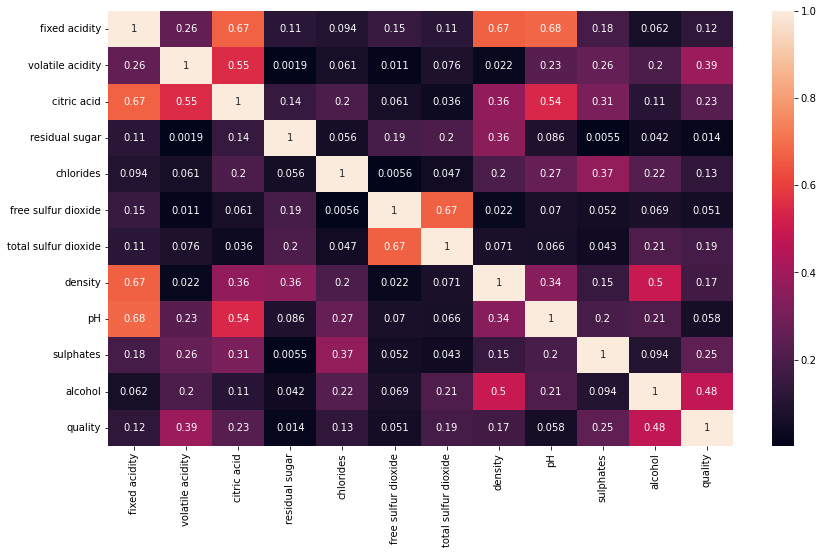

In [17]:
df1=data['alcohol']
data.head()


df_corr=data.corr().abs()
plt.figure(figsize=(14,8))
sns.heatmap(df_corr, annot=True, annot_kws={'size':10})
plt.show()


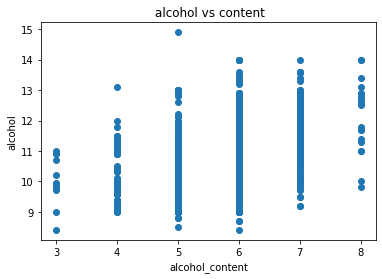

In [19]:
plt.scatter(data.quality, data.alcohol)
plt.xlabel('alcohol_content')
plt.ylabel('alcohol')
plt.title(' alcohol vs content')
plt.show()


In [85]:
X=data.drop(columns=['quality', 'alcohol'])
y=data['quality']

x_train,x_test, y_train, y_test= train_test_split(X, y, test_size= 0.25, random_state=105)


In [102]:
def metric_score(clf, x_train,x_test, y_train, y_test, train=True):				
	if train:			
		y_pred=clf.predict(x_train)		
		print(f"accuracy score: {accuracy_score(y_train, y_pred) * 100:.2f}%")		
	elif train==False:
		pred=clf.predict(x_test)
		print(f"accuracy score: {accuracy_score(y_test, pred) *100:.2f}%")
		print('classification report', classification_report(y_test,pred, digits=2))


In [103]:
clf=DecisionTreeClassifier()
clf.fit(x_train, y_train)

DecisionTreeClassifier()

In [104]:
metric_score(clf, x_train, x_test, y_train, y_test, train=True)

metric_score(clf, x_train, x_test, y_train, y_test, train=False)

accuracy score: 100.00%
accuracy score: 61.75%
classification report               precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       0.12      0.08      0.10        13
           5       0.69      0.71      0.70       172
           6       0.59      0.64      0.61       152
           7       0.56      0.48      0.52        56
           8       0.00      0.00      0.00         3

    accuracy                           0.62       400
   macro avg       0.33      0.32      0.32       400
weighted avg       0.60      0.62      0.61       400



In [107]:
y_pred=clf.predict(x_test)

confusion_matrix(y_test, y_pred)




array([[  0,   0,   1,   3,   0,   0],
       [  0,   1,  10,   2,   0,   0],
       [  0,   4, 122,  38,   7,   1],
       [  0,   3,  39,  97,  13,   0],
       [  0,   0,   5,  23,  27,   1],
       [  0,   0,   1,   1,   1,   0]], dtype=int64)

In [109]:
pd.DataFrame(confusion_matrix(y_test, y_pred), columns=['q3', 'q4', 'q5', 'q6', 'q7', 'q8'], index=['q3', 'q4', 'q5', 'q6', 'q7', 'q8'])


,q3,q4,q5,q6,q7,q8
q3,0,0,1,3,0,0
q4,0,1,10,2,0,0
q5,0,4,122,38,7,1
q6,0,3,39,97,13,0
q7,0,0,5,23,27,1
q8,0,0,1,1,1,0


In [124]:
grid_param={		
	  'criterion': ['gini', 'entropy'],	
	  'max_depth':range(10,15),	
	  'min_samples_leaf':range(2,6),	
	  'min_samples_split':range(3,10),	
	   'max_leaf_nodes':range(5,15)}	


In [125]:
from sklearn.model_selection import GridSearchCV

In [126]:
grid_search=GridSearchCV(estimator=clf,		
		       param_grid=grid_param,
		       cv=5,
		    n_jobs=-1)


In [139]:
grid_search.fit(x_train, y_train)

best_parameters=grid_search.best_params_
print(best_parameters)

clf=DecisionTreeClassifier(criterion= 'entropy', min_samples_split=3, max_depth=7, min_samples_leaf=2, )

clf.fit(x_train,y_train)


{'criterion': 'gini', 'max_depth': 10, 'max_leaf_nodes': 11, 'min_samples_leaf': 2, 'min_samples_split': 3}


DecisionTreeClassifier(criterion='entropy', max_depth=7, min_samples_leaf=2,
                       min_samples_split=3)

In [140]:
metric_score(clf, x_train, x_test, y_train, y_test, train=True)

metric_score(clf, x_train, x_test, y_train, y_test, train=False)


accuracy score: 70.64%
accuracy score: 58.75%
classification report               precision    recall  f1-score   support

           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00        13
           5       0.67      0.74      0.70       172
           6       0.54      0.64      0.58       152
           7       0.53      0.18      0.27        56
           8       0.00      0.00      0.00         3

    accuracy                           0.59       400
   macro avg       0.29      0.26      0.26       400
weighted avg       0.56      0.59      0.56       400



In [141]:
y_pred=clf.predict(x_test)

pd.DataFrame(confusion_matrix(y_test, y_pred), columns=['q3', 'q4', 'q5', 'q6', 'q7', 'q8'], index=['q3', 'q4', 'q5', 'q6', 'q7', 'q8'])


,q3,q4,q5,q6,q7,q8
q3,0,0,3,1,0,0
q4,1,0,10,2,0,0
q5,1,0,128,43,0,0
q6,0,2,43,97,9,1
q7,0,1,8,35,10,2
q8,0,0,0,3,0,0
